# IBM Developer Australia Qiskit Demo
- **Huang Junye**
- Quantum Developer Advocate
- IBM Quantum & Qiskit community team
- *May 13, 2020*

# Outline
- Qiskit elements
- Demo
    - Superposition
    - Measurement
    - Entanglement
    - Quantum gates
    - Interference

# Qiskit elements
![Qiskit elements](figures/qiskit_elements.png)

# Demo

- Using [Circuit Composer](https://quantum-computing.ibm.com/composer/ddfedca0eb599c89a1a38ee16be048a5) on IBM Quantum Experience
- Using Qiskit code (in this deck)

## Superposition
Superposition is creating a quantum state that is a combination of |0> and |1>.
<img src="figures/Schrodingers_cat.svg" alt="Schrodinger's cat" style="width: 1200px;"/>

### Import Qiskit

In [1]:
from qiskit import QuantumCircuit, execute # for creating and executing quantum circuits
from qiskit.visualization import iplot_state_qsphere, plot_histogram # for visualization
%config InlineBackend.figure_format = 'svg' # make images look nice

### Create a quantum circuit

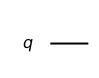

In [2]:
qc0 = QuantumCircuit(1) # create a quantum circuit with 1 qubit
qc0.draw('mpl') # visualize the circuit 

In [3]:
from qiskit.providers.aer import StatevectorSimulator 
# StatevectorSimulator returns final quantum statevector of the circuit

state0 = execute(qc0, StatevectorSimulator()).result().get_statevector() # execute simulation
iplot_state_qsphere(state0) # visualize statevector in a qsphere

### Add quantum gates

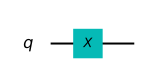

In [4]:
qc1 = QuantumCircuit(1)
qc1.x(0) # apply X gate to qubit 0
qc1.draw('mpl')

In [5]:
state1 = execute(qc1, StatevectorSimulator()).result().get_statevector()
iplot_state_qsphere(state1)

### Create superposition

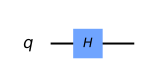

In [6]:
qc2 = QuantumCircuit(1)
qc2.h(0) # apply Hadamard gate to qubit 0
qc2.draw('mpl')

In [7]:
state2 = execute(qc2, StatevectorSimulator()).result().get_statevector()
iplot_state_qsphere(state2)

## Measurement
Measurement is an action that forces a qubit to either |0> or |1> based on probability.

![Schrodinger cat measurement](figures/schrodingers_cat_measurement.png)

### Add measurement operation

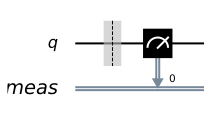

In [8]:
qc0.measure_all() # measure all qubits and store the result in classical bits
qc0.draw('mpl')

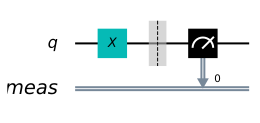

In [9]:
qc1.measure_all()
qc1.draw('mpl')

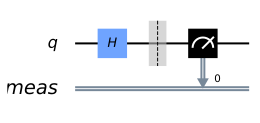

In [10]:
qc2.measure_all()
qc2.draw('mpl')

### Measurement statistics

In [11]:
from qiskit.providers.aer import QasmSimulator # QasmSimulator micmic beheaviour of real devices

# real devices require multiple execution (shots, default=1024) to obtain outcome statistics
counts0 = execute(qc0, QasmSimulator(), shots=1000).result().get_counts()
counts1 = execute(qc1, QasmSimulator(), shots=1000).result().get_counts()
counts2 = execute(qc2, QasmSimulator(), shots=1000).result().get_counts()
print(counts0, counts1, counts2)

{'0': 1000} {'1': 1000} {'0': 487, '1': 513}


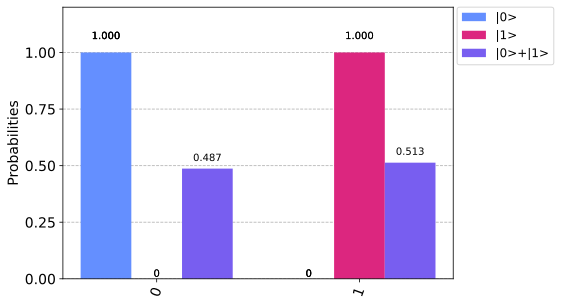

In [12]:
plot_histogram([counts0, counts1, counts2], legend=['|0>','|1>','|0>+|1>']) # visualize outcome statistics

## Entanglement
Entanglement strongly connects two or more qubits so that their quantum states are no longer independent.

<center><img src="figures/quantum_entanglement.jpg" alt="Quantum entanglement" style="width: 1000px;"/></center>

### Hadamard with 2 qubits

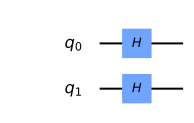

In [13]:
qc4 = QuantumCircuit(2) # create a quantum circuit with 2 quantum bits
qc4.h(0)
qc4.h(1)
qc4.draw('mpl')

In [14]:
state4 = execute(qc4, StatevectorSimulator()).result().get_statevector()
iplot_state_qsphere(state4) # plot the cityscape of quantum state

### Bell state $|\phi\rangle = 1 / \sqrt{2}(|00\rangle + |11\rangle)$ 

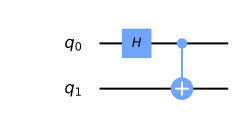

In [15]:
qc5 = QuantumCircuit(2) # create a quantum circuit with 2 quantum bits
qc5.h(0)
qc5.cx(0,1) # apply a CNOT gate with qubit 0 as control and qubit 1 as target
qc5.draw('mpl')

In [16]:
state5 = execute(qc5, StatevectorSimulator()).result().get_statevector()
iplot_state_qsphere(state5) # plot the cityscape of quantum state

### Measurement statistics for Bell state

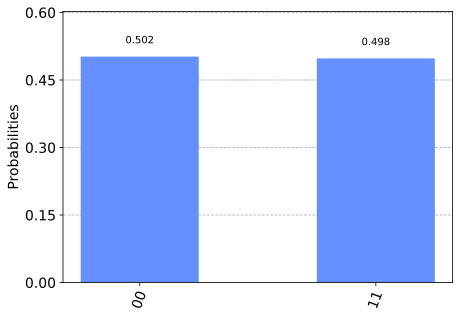

In [17]:
qc5.measure_all()
counts5 = execute(qc5, QasmSimulator()).result().get_counts()
plot_histogram(counts5)

## Quantum gates
Quantum gates perform the basic computational operations on qubits (think of as counterparts to classical and, +, and so on).

![Quantum gates](figures/quantum_gates.png)

- [Quantum instruction glossary](https://quantum-computing.ibm.com/docs/circ-comp/q-gates)
- [IBM Quantum Experience](https://quantum-computing.ibm.com/composer/ddfedca0eb599c89a1a38ee16be048a5)

## Interferenece
Interference allows us to increase the probability of getting the right answer and decrease the chance of getting the wrong one.

[IBM Quantum Experience Demo: Grover's algorithm](https://quantum-computing.ibm.com/composer/3cf2c268c828e4316ccd9988745539d9)

![Grover's algorithm](figures/grover_algorithm.png)

### Create Grover circuit from OpenQASM code

In [18]:
# OpenQASM code for a 3-qubit Grover's algorithm, copied from IQX circuit composer
grover_str = """

OPENQASM 2.0;
include "qelib1.inc";

qreg q[3];
creg c[3];

h q[0];
h q[1];
h q[2];
barrier q[0],q[1],q[2];
x q[0];
x q[2];
h q[2];
ccx q[0],q[1],q[2];
x q[0];
h q[2];
x q[2];
barrier q[0],q[1],q[2];
h q[0];
h q[1];
h q[2];
x q[0];
x q[1];
x q[2];
h q[2];
ccx q[0],q[1],q[2];
x q[0];
x q[1];
h q[2];
h q[0];
h q[1];
x q[2];
h q[2];
barrier q[0],q[1],q[2];
x q[0];
x q[2];
h q[2];
ccx q[0],q[1],q[2];
x q[0];
h q[2];
x q[2];
barrier q[0],q[1],q[2];
h q[0];
h q[1];
h q[2];
x q[0];
x q[1];
x q[2];
h q[2];
ccx q[0],q[1],q[2];
x q[0];
x q[1];
h q[2];
h q[0];
h q[1];
x q[2];
h q[2];
barrier q[0],q[1],q[2];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];

"""

### Create Grover circuit from OpenQASM code

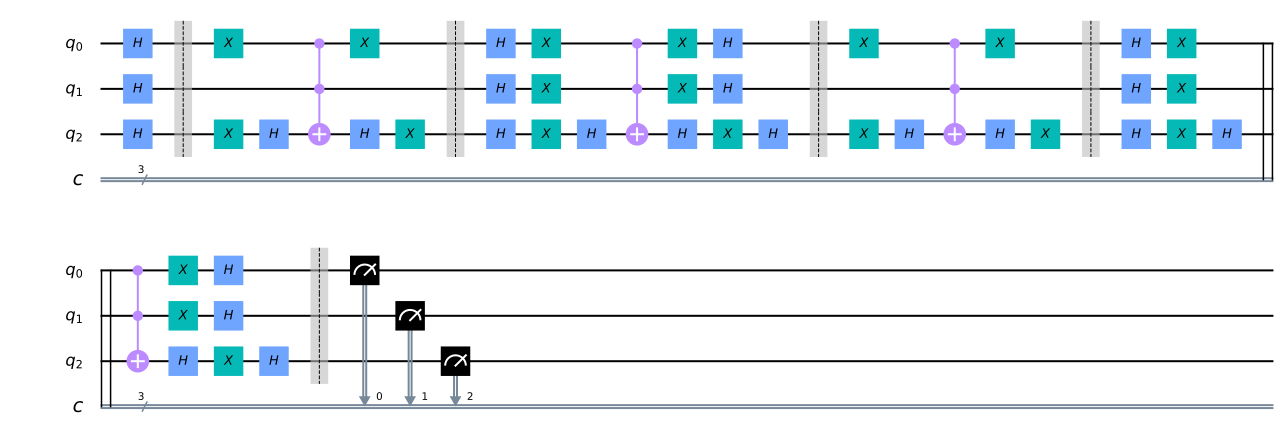

In [19]:
grover_circuit = QuantumCircuit.from_qasm_str(grover_str) # create a quantum circuit from OpenQASM code
grover_circuit.draw('mpl') 

### Create Grover circuit using Qiskit code

In [20]:
def grover_algorithm(qc, iteration):
    """Implement Grover's algorithm with number of iterations as input"""
    
    # apply hadamard gate to each qubit to generate equal superposition state
    for qubit in range(qc.num_qubits):
        qc.h(qubit)
    qc.snapshot('hadamard all') 
    
    for i in range(iteration):
        oracle_010(qc) # apply oracle
        qc.snapshot('oracle'+str(i+1)) # take a snapshot of the quantum state for visualization
        
        diffuser(qc) # apply diffuser
        qc.snapshot('reflection'+str(i+1))
        
    qc.measure_all()

### Implement oracle and diffuser

In [21]:
def oracle_010(qc):
    """Implement a oracle with |010> as winner state"""
    qc.x(0)
    qc.x(2)
    qc.h(2)
    qc.ccx(0,1,2)
    qc.h(2)
    qc.x(0)
    qc.x(2)
    
def diffuser(qc):
    """Apply inversion about the average step of Grover's algorithm."""
    
    for qubit in range(qc.num_qubits):
        qc.h(qubit)
        qc.x(qubit)
        
    qc.h(2)
    qc.ccx(0,1,2)
    qc.h(2)
    
    for qubit in range(qc.num_qubits):
        qc.x(qubit)
        qc.h(qubit)

### Visualize statevector snapshot

In [22]:
import numpy as np # use NumPy array for storing snapshots
import matplotlib.pyplot as plt # for plotting 
    
def get_snapshot_statevector(result, label):
    """Get statevector of a snapshot with desired label"""
    return result.data()['snapshots']['statevector'][label]

def plot_snapshot_amplitude(snapshot):
    """Plot state amplitude of a snapshot"""
    state = np.asarray(snapshot[0])
    amplitude = {}
    for i in range(len(state)):
        amplitude[f'{i:03b}'] = state[i].real
    return plt.bar(amplitude.keys(),amplitude.values())

def plot_snapshot_qsphere(snapshot):
    """Plot state qsphere of a snapshot"""
    state = np.asarray(snapshot[0])
    amplitude = {}
    for i in range(len(state)):
        amplitude[f'{i:03b}'] = state[i].real
    return iplot_state_qsphere(state)

### Grover's algorithm with 3 qubits and 2 iterations

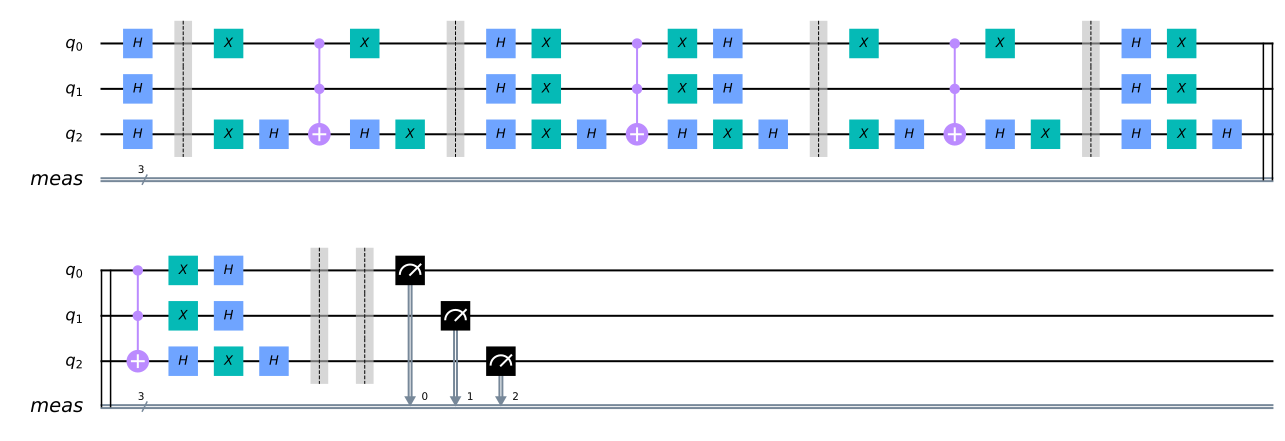

In [23]:
# create a 3-qubit quantum circuit
num_qubit = 3
grover_circuit = QuantumCircuit(num_qubit)

grover_algorithm(grover_circuit, iteration=2) # Grover's algorithm iterations

grover_circuit.draw('mpl')

In [24]:
# simulate Grover circuit using StatevectorSimulator
job_sim = execute(grover_circuit, StatevectorSimulator())
result = job_sim.result()

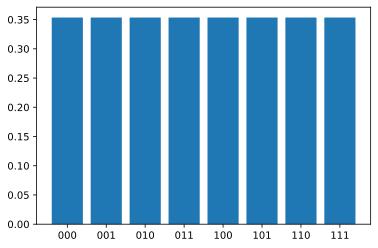

In [25]:
# snapshot of state amplitude after applying hadamard_all
snap0 = get_snapshot_statevector(result, 'hadamard all')
plot_snapshot_amplitude(snap0)
plot_snapshot_qsphere(snap0)

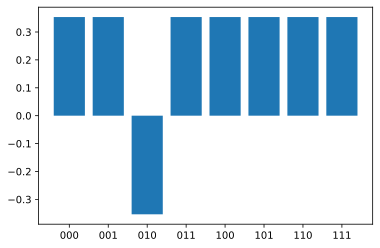

In [26]:
# snapshot of state amplitude after applying oracle
snap1 = get_snapshot_statevector(result, 'oracle1')
plot_snapshot_amplitude(snap1)
plot_snapshot_qsphere(snap1)

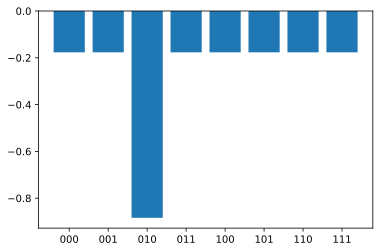

In [27]:
# snapshot of state amplitude after applying reflection
snap2 = get_snapshot_statevector(result, 'reflection1')
plot_snapshot_amplitude(snap2)
plot_snapshot_qsphere(snap2)

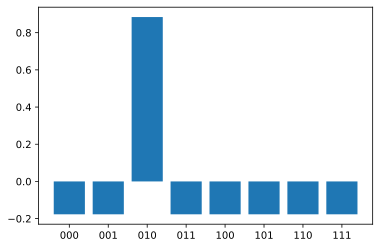

In [28]:
# snapshot of state amplitude after applying oracle in the 2nd iteration
snap3 = get_snapshot_statevector(result, 'oracle2')
plot_snapshot_amplitude(snap3)
plot_snapshot_qsphere(snap3)

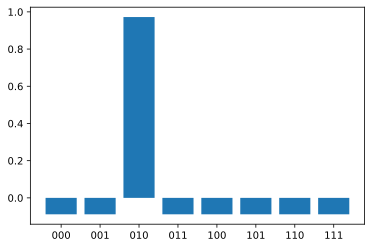

In [29]:
# snapshot of state amplitude after applying reflection in the second iteration
snap4 = get_snapshot_statevector(result, 'reflection2')
plot_snapshot_amplitude(snap4)
plot_snapshot_qsphere(snap4)

## IBM Quantum Challenge

- Celebrate [4th anniversary of IBM Quantum Experience](https://www.ibm.com/blogs/research/2020/05/quantum-challenge-results/).
- 4 quantum programming exercises to be solved in 4 days (4-8 May)
- 1745 Participants from 45 countries
- During the 96 hours of the Challenge, the total use of the 18 IBM Quantum systems on the IBM Cloud **exceeded 1 billion circuits a day**.
-

## Qiskit education resources
- [Coding with Qiskit Youtube series](https://www.youtube.com/watch?v=a1NZC5rqQD8&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY)
- [Get started with IBM Quantum Experience](https://quantum-computing.ibm.com/docs/)
- [Qiskit textbook](https://qiskit.org/textbook/preface.html)
- [Qiskit Live](https://www.youtube.com/channel/UClBNq7mCMf5xm8baE_VMl3A/featured)
- [Qiskit Twitter](https://twitter.com/qiskit)
- [Qiskit Slack](http://ibm.co/joinqiskitslack)
- [IBM Quantum Challenge](https://www.ibm.com/blogs/research/2020/05/quantum-challenge-results/)


### Coding with Qiskit

In [30]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/a1NZC5rqQD8", width=1200, height=675)

### Qiskit Live

In [31]:
IFrame(src="https://www.youtube.com/embed/Omv-bPvQ3E8", width=1200, height=675)